In [2]:
# regression: is continue math to find out the exact value for a given input y = f(x), y is continue(1.3, 1.2, 2, 2.3)

In [3]:
# classification: is dicrete math to find out the target label for a given input y = f(x), y is dicrete(0/1, 0/1/2/3/4)

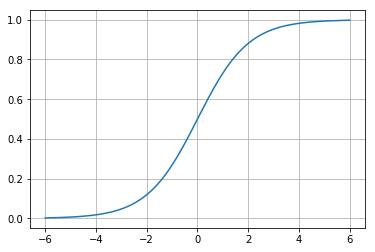

In [4]:
# Logistic Regression: is a classifier

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create a vector of equally spaced x values with linspace
x = np.linspace(-6, 6, 1000)

# Evaluate the Logistic function for each value in x
y = 1 / (1 + np.exp(-x))

fig = plt.figure()

plt.plot(x, y)
plt.grid()

plt.show()

# common practise:
# if y < 0.5, we take y = 1, otherwise y = 0, however, in the real industry, the threshold can be set to different number
# simplest version: t = x

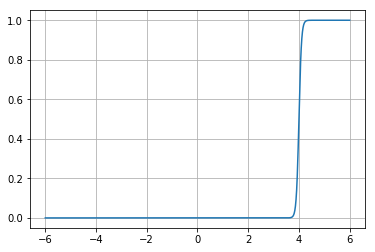

In [5]:
# this is what we normally do we thak f(x) as a input for logistic regression
# in this case: k*(x - x_0)

# intercepts, it shifts the whole graph left or right, it is the center points for y = 0.5 (x = x0)
x_0 = 4

# cofficient, it controls how fast that the graph from 0 to 1
k = 20

# Create a vector of equally spaced x values with linspace
x = np.linspace(-6, 6, 1000)

# Evaluate the Logistic function for each value in x
y = 1 / (1 + np.exp(-k*(x - x_0)))

fig = plt.figure()

plt.plot(x, y)
plt.grid()

plt.show()

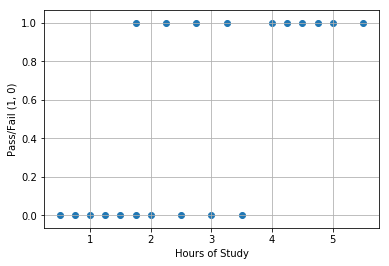

In [6]:
# number of hours
x_hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])

# 0 is fail, 1 is pass
y_pass = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

fig = plt.figure()

plt.scatter(x_hours, y_pass)
plt.grid()

plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")

plt.show()

In [7]:
# Build and fit a linear regression

import statsmodels.api as sm

# add all 1 for bias(intercepts)
x_with_intercept = sm.add_constant(x_hours, prepend=True)

# using OLS api to compute the linear regression
model = sm.OLS(y_pass, x_with_intercept)

# training 
results = model.fit()

C:\Program Files\Anaconda3-5.0.1x64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


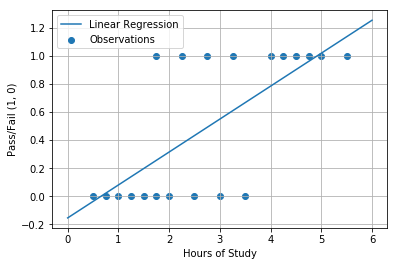

In [8]:
# Plot the linear regression prediction

# x points is the x axis for the blue line
x_points = np.linspace(0, 6, 100)
# y_liear model is the y axis for the blue line
y_linear_model = results.predict(sm.add_constant(x_points, prepend=True))

fig = plt.figure()

plt.scatter(x_hours, y_pass, label = "Observations")

# Plot linear regression model
plt.plot(x_points, y_linear_model, label = "Linear Regression")

plt.grid()
plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")
plt.legend()

plt.show()

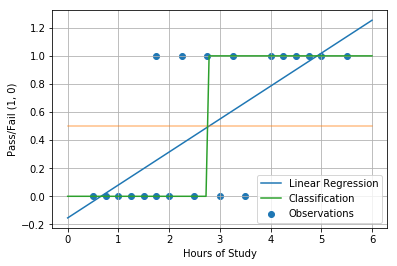

In [9]:
# Plot the linear regression prediction

classification = (y_linear_model > 0.5).astype(int)

fig = plt.figure()

plt.scatter(x_hours, y_pass, label = "Observations")

# Plot linear regression model
plt.plot(x_points, y_linear_model, label = "Linear Regression")

# Plot the decision boundary
plt.plot(x_points, np.ones(100) * 0.5, alpha = 0.5) # We classify any points with p > 0.5 as success
plt.plot(x_points, classification, label = "Classification")

plt.grid()
plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")
plt.legend()

plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# LogisticRegression call the __init__ in the LogisticRegression class
# so the log_reg is an object
# if you not sure, refer the week 1 class & object
log_reg = LogisticRegression(C = 1e16, solver = 'liblinear')

In [12]:
print(x_hours.shape)
# google the reshape, this is very useful
print(x_hours.reshape(-1, 1).shape)

(20,)
(20, 1)


In [13]:
# training the logistic regression
log_reg.fit(x_hours.reshape(-1, 1), y_pass)

LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# Create vector of x values to evaluate the model
x_points = np.linspace(0, 6, 100)

# predict_proba returns the probabilities of each class. Column 0 is class=0, column 1 is class=1 (sucess)
y_log_model = log_reg.predict_proba(x_points.reshape(-1, 1))[:,1]

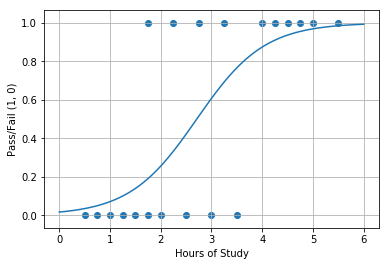

In [15]:
fig = plt.figure()

plt.scatter(x_hours, y_pass)
plt.plot(x_points, y_log_model)
plt.grid()

plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")

plt.show()

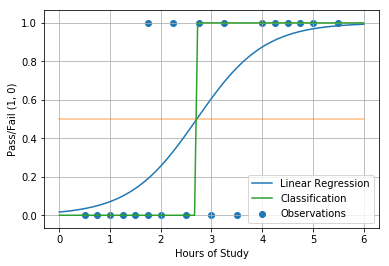

In [16]:
# Plot the logistic regression prediction
classification = log_reg.predict(x_points.reshape(-1, 1))

fig = plt.figure()

plt.scatter(x_hours, y_pass, label = "Observations")

# Plot logistic regression model
plt.plot(x_points, y_log_model, label = "Linear Regression")

# Plot the decision boundary
plt.plot(x_points, np.ones(100) * 0.5, alpha = 0.5) # We classify any points with p > 0.5 as success
plt.plot(x_points, classification, label = "Classification")

plt.grid()
plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")
plt.legend()

plt.show()

In [17]:
log_reg.intercept_[0]

-4.0777133660750389

In [18]:
log_reg.coef_[0][0]

1.5046454013690902

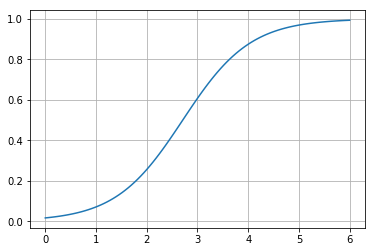

In [19]:
x_points = np.linspace(0, 6, 100)

# intercept_[0]  is  -4.0777133660750389
# coef_[0][0] is 1.5046454013690902
y_log_model_manual = 1 / (1 + np.exp(-(log_reg.intercept_[0] + log_reg.coef_[0][0] * x_points )))

fig = plt.figure()

plt.plot(x_points, y_log_model_manual)
plt.grid()

plt.show()

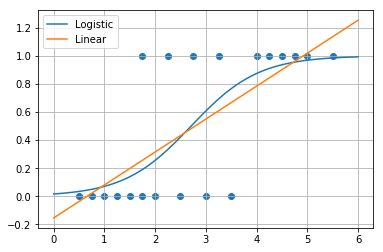

In [20]:
fig = plt.figure()

plt.scatter(x_hours, y_pass)
plt.plot(x_points, y_log_model, label = "Logistic")
plt.plot(x_points, y_linear_model, label  ="Linear")

plt.grid()
plt.legend()

plt.show()

In [21]:
from sklearn.datasets import load_breast_cancer

data_dict = load_breast_cancer()

# You can print out the full description using the next line.
print(data_dict.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [22]:
# (569, 30)
data_dict.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [23]:
data_dict['data'].shape

(569, 30)

In [24]:
data_dict['target'].shape

(569,)

In [25]:
# initialize
log_res_multi = LogisticRegression(C = 1e19, solver = 'liblinear')

# train using .fit(data, target)
log_res_multi.fit(data_dict.data, data_dict.target)

LogisticRegression(C=1e+19, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
obs_idx = 20

obs = data_dict.data[obs_idx, :]

# observation data which is the 20th set in the dataset
print(obs.shape)
print(obs.reshape(1, 30).shape)

# predict using the obs
prediction = log_res_multi.predict(obs.reshape(1, 30))

(30,)
(1, 30)


In [27]:
# find the target based on the prediction
obs_class = data_dict.target[obs_idx]

In [28]:
print("True class: {0}".format(obs_class))
print("Predicted class: {0}".format(prediction[0]))

True class: 1
Predicted class: 1


In [29]:
# you need reshape the input x before using .predict()
# you don't have to re-train it
# Q2: 
# log_reg.fit(x_hours.reshape(-1, 1), y_pass)
log_reg.predict([[3.01]])

array([1])

In [30]:
data_test = np.array([16.74, 21.59, 110.1, 869.5, 0.0961, 0.1336, 0.1348, 0.06018, 0.1896, 0.05656, 0.4615, 0.9197, 3.008, 45.19, 0.005776, 0.02499, 0.03695, 0.01195, 0.02789, 0.002665, 20.01, 29.02, 133.5, 1229.0, 0.1563, 0.3835, 0.5409, 0.1813, 0.4863, 0.08633])
print(data_test.shape)
data_test = data_test.reshape(1, 30)
log_res_multi.predict(data_test)

(30,)


array([0])

In [31]:
from sklearn.metrics import confusion_matrix

y_pred = log_res_multi.predict(data_dict.data)

print(confusion_matrix(data_dict.target, y_pred))

[[199  13]
 [  6 351]]


In [32]:
tn, fp, fn, tp = confusion_matrix(data_dict.target, y_pred).ravel()

(tn, fp, fn, tp)

(199, 13, 6, 351)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(data_dict.target, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95       212
          1       0.96      0.98      0.97       357

avg / total       0.97      0.97      0.97       569



In [34]:
# for everything you predict as postive, how many things you doing right
precision = tp / (tp + fp)

In [35]:
# for every data whose label is postive, how many things you doing right
recall = tp / (tn + fn)

In [36]:
# F1 score is an overall measurement

# q1 what is precision = 1
# a1: when there is not FP
# q1-1 is precison = 1 means I predict everything correct?
# a1-1: no

# label: 1, 0, 1, 0, 1
# prediction:0, 0, 1, 0, 1

# TP = 2, FP = 0, TN = 2, FN = 1
# precison = 2+0/2 = 1
# recall 2/2+1 = 2/3


# q2 what is the recall is 1
# a2 FN = 0

# q3 what is the F1 =1
# a3 every thing here is right

# F1 = 1
# [N, 0
#  0, M]

In [37]:
# 
# this is our first model 
data = np.array([3.05]).reshape(1, 1)
print(data.shape)
print(log_reg.predict(data))
print(log_reg.predict_proba(data))

(1, 1)
[1]
[[ 0.37485248  0.62514752]]


In [39]:
# predict the breast cancer using the data 
data_2 = np.array([16.74, 21.59, 110.1, 869.5, 0.0961, 0.1336, 0.1348, 0.06018, 0.1896, 0.05656, 0.4615, 0.9197, 3.008, 45.19, 0.005776, 0.02499, 0.03695, 0.01195, 0.02789, 0.002665, 20.01, 29.02, 133.5, 1229.0, 0.1563, 0.3835, 0.5409, 0.1813, 0.4863, 0.08633])
print(data_2.shape)
print(data_2.reshape(1, 30).shape)
print(log_res_multi.predict(data_2.reshape(1,30)))
print(log_res_multi.predict_proba(data_2.reshape(1,30)))

(30,)
(1, 30)
[0]
[[  9.99966837e-01   3.31628343e-05]]


In [40]:
# summary:
# 1. build the model: LogisticRegression()
# 2. train the model: .fit(data, label), data must be 2D 
# 3. test the model: .predict() or .predictproba()

In [45]:
# Task
import pandas as pd

default = pd.read_csv('default.csv')

default.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [42]:
# Check how many data points we actually have
# This means we have 10,000 customers, and 4 attributes.
default.shape

default['default'].shape

(10000,)

In [43]:
# Look at the output variable column ('default'), and COUNT the number of people for each class (yes / no)
# It seems like we have much more people in our dataset that did not default
# This is a problem because this can make our classifier be biased towards people who say no
# This means later on, we need to be careful and rebalance the weighting for our classifer

default['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [46]:
# why we use drop_first = True?? because we need to prevent the "multicoliearity"!
# refer to week 6 
default = pd.get_dummies(default, drop_first=True)

In [47]:
# week 4! why we use groupby
default.groupby('default').mean()

,balance,income,student_Yes
default,,,
0,803.94375,33566.166625,0.291404
1,1747.82169,32089.147124,0.381381


In [48]:
# the balance is the only features that varies when the target label change!
ratio = default.groupby('default').mean().loc[1] / default.groupby('default').mean().loc[0]

ratio = ratio.sort_values(ascending=False)

ratio

balance        2.174060
student_Yes    1.308773
income         0.955997
dtype: float64

In [49]:
print(default.corr()['default'].abs().sort_values())

income         0.019871
student_Yes    0.035420
balance        0.350119
default        1.000000
Name: default, dtype: float64


In [54]:
print(default.corr()) # gives the affintity matrix
print(default.corr()['default'])
print(default.corr()['default'].abs().sort_values())

              default   balance    income  student_Yes
default      1.000000  0.350119 -0.019871     0.035420
balance      0.350119  1.000000 -0.152243     0.203578
income      -0.019871 -0.152243  1.000000    -0.753985
student_Yes  0.035420  0.203578 -0.753985     1.000000
default        1.000000
balance        0.350119
income        -0.019871
student_Yes    0.035420
Name: default, dtype: float64
income         0.019871
student_Yes    0.035420
balance        0.350119
default        1.000000
Name: default, dtype: float64


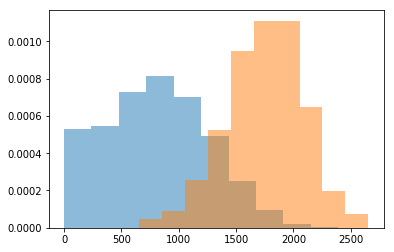

In [56]:
# we can only use balance to predict
%matplotlib inline
import matplotlib.pyplot as plt

# Let's visualise the distributions of balance for the two classes
# Make sure to set density = True to ignore any scaling effects

# week 2,3 we talk about histrogram!
# you see the balance in 2 obvious distributions when the default is different
plt.hist(default[default['default'] == 0]['balance'], alpha = 0.5, density=True)
plt.hist(default[default['default'] == 1]['balance'], alpha = 0.5, density=True)

plt.show()

In [57]:
# now we use balance and default to train the data

feature_name = 'balance'
target_name = 'default'

# Our input training data comes from our feature
x_train = default[feature_name]

# Our output training data comes from our target
y_train = default[target_name]

from sklearn.linear_model import LogisticRegression

# build
log_reg = LogisticRegression(solver = 'liblinear', C = 1e16, class_weight="balanced")

# train
log_reg.fit(x_train.values.reshape(-1, 1), y_train)

LogisticRegression(C=1e+16, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [58]:
# predict
import numpy as np
# This gives us the probabilities of class 0 and class 1
# Note that the probability of class 0 is higher!
log_reg.predict_proba(np.array([[0]]))

array([[  9.99322360e-01,   6.77640080e-04]])

In [59]:
log_reg.predict(np.array([[0]]))

array([0], dtype=int64)